In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os as os
import cv2 as cv
import csv
from PIL import Image, ImageFont, ImageDraw, ImageFilter
from skimage.feature import canny
import pandas as pd
import skimage.measure    

In [10]:
def get_hsv(image):
    image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV) #convert image dari BGR ke HSV
    return image_hsv

    
image_1rb = cv.imread("./Images/Training2/1rb/IMG_20211019_124212.jpg")
image_1rb = get_hsv(image_1rb) 
print(image_1rb[0])

[[ 30  15 139]
 [ 30  15 139]
 [ 30  15 138]
 ...
 [ 30  14 149]
 [ 30  14 147]
 [ 30  14 149]]


In [22]:
#Membuat array of objeck (training_data)
training_data = {'label': [],
                'mean': [],
                'std': [],
                'skewness': [],
                'entropy':[]
                }

#Sebagai variabel untuk rezise gambar
img_size = 400

#mengambil path setiap kategori pada folder training2
data_dir = './Images/Training2/'
categories = ['1rb','2rb','5rb','10rb','20rb','50rb','75rb','100rb']

#fungsi membuat data yang akan di training
def create_training_data():
    for category in categories: 
        
        #menggabungkan path data_dir dengan categori-categori folder 
        path = os.path.join(data_dir,category)
    
        #memasukkan category ke class_num sebagai label
        class_num = category
    
        #mengambil gambar satu persatu pada masing-masing folder
        for image in os.listdir(path):
            try:
                images = cv.imread(os.path.join(path,image)) #gabungin path dan image
                images_bgr = cv.cvtColor(images,cv.COLOR_RGB2BGR) #convert image dari RGB ke BGR
                images_size = cv.resize(images_bgr,(img_size,img_size)) #resize image ke 400x400
                image_hsv = cv.cvtColor(images_size, cv.COLOR_BGR2HSV) #convert image dari BGR ke HSV
                
                #Ekstraksi fitur HSV
                mean = np.mean(image_hsv)
                std = np.std(image_hsv)
                skewness = np.mean(abs(image_hsv - image_hsv.mean()) ** 3)
                skewness = skewness ** (1./3)
                entropy = skimage.measure.shannon_entropy(image_hsv)
                
                #Memasukkan masing masing ekstraksi HSV ke object of array (training_data)
                training_data['label'].append(class_num)
                training_data['mean'].append(mean)
                training_data['std'].append(std)
                training_data['skewness'].append(skewness)
                training_data['entropy'].append(entropy)
              
            except Exception as e:
                pass
    
#memanggil fungsi
create_training_data()

In [23]:
#membuat data frame menggunakan library pandas
dataset = pd.DataFrame(training_data)
dataset

,label,mean,std,skewness,entropy
0,1rb,85.329925,51.790131,58.440932,7.248304
1,1rb,85.087467,53.800626,60.028901,7.233579
2,1rb,85.033915,57.157153,61.773406,7.317767
3,1rb,83.080033,53.404586,57.824640,7.264265
4,1rb,98.281065,54.132914,60.525660,7.487554
...,...,...,...,...,...
236,100rb,112.160565,62.228011,69.137087,7.663816
237,100rb,117.427048,77.766811,83.257176,7.583666
238,100rb,107.471785,64.000018,68.481659,7.437994
239,100rb,106.140765,69.298576,72.994656,7.423348


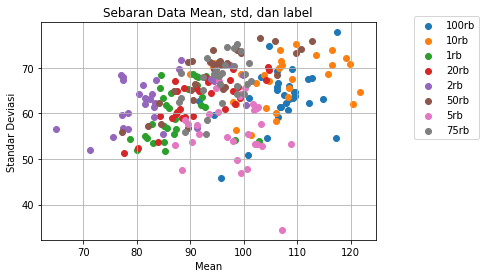

In [24]:
#Visualisasi data menggunakan scatter plot
fig, ax = plt.subplots()
for jk, d in dataset.groupby('label'):
    ax.scatter(d['mean'],d['std'], label=jk)
    
plt.legend(bbox_to_anchor=(1.1,1.05))
plt.title('Sebaran Data Mean, std, dan label')
plt.xlabel('Mean')
plt.ylabel('Standar Deviasi')
plt.grid(True)
plt.show()

In [25]:
#save to csv file
dataset.to_csv("Rupiah_money_data_list.csv")